In [1]:
# Importing libraries 
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
#Loading data 
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train.shape, y_train.shape,x_test.shape, y_test.shape

4422102/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

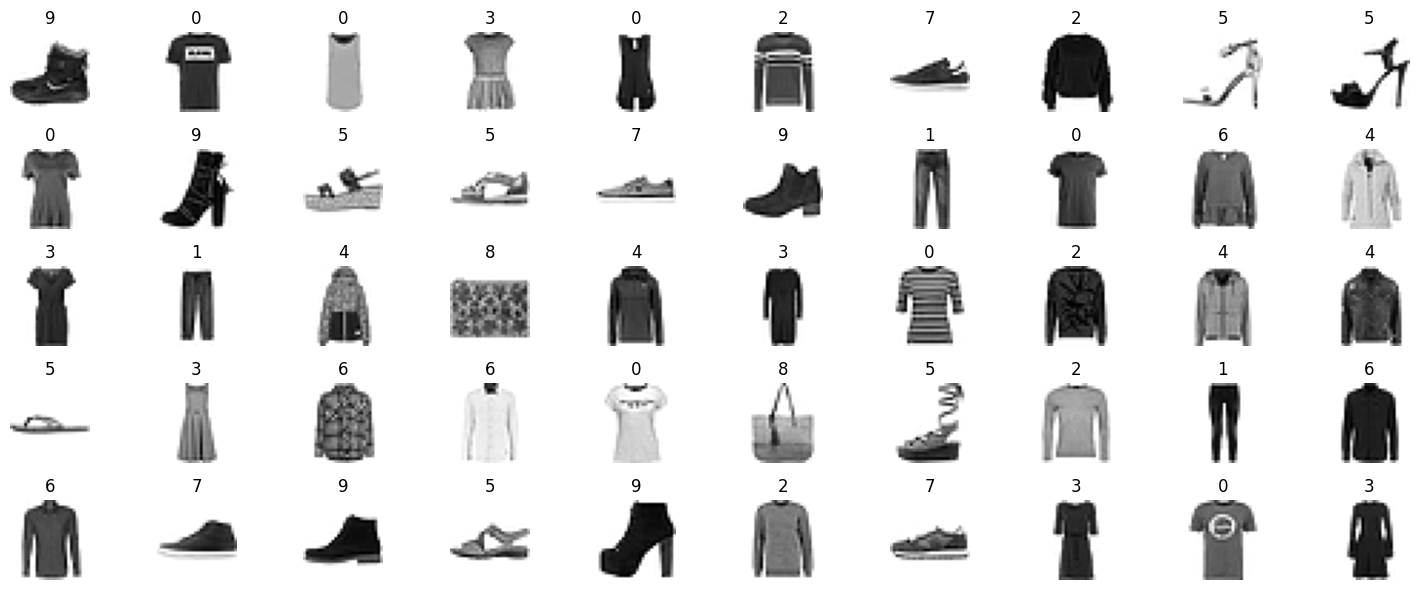

In [4]:
#Plotting some random samples of the images 
plt.figure(figsize = (15, 6))
plotnumber = 1

for i in range(51):
    if plotnumber <= 50:
        ax = plt.subplot(5, 10, plotnumber)
        plt.imshow(x_train[i], cmap = 'binary')
        plt.axis('off')
        plt.title(y_train[i], fontdict = {'fontsize'  : 12, 'color' : 'black'})

    plotnumber += 1

plt.tight_layout()
plt.show()

In [54]:
#Building The Neural Network 
model=Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    Dense(120,activation='relu'),
    Dense(60,activation='relu'),
    Dense(30,activation='relu'),
    Dense(10,activation='softmax')



])

In [55]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 120)               94200     
                                                                 
 dense_21 (Dense)            (None, 60)                7260      
                                                                 
 dense_22 (Dense)            (None, 30)                1830      
                                                                 
 dense_23 (Dense)            (None, 10)                310       
                                                                 
Total params: 103,600
Trainable params: 103,600
Non-trainable params: 0
_________________________________________________________________


In [56]:
#train and test the neural network 
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=50,validation_split=0.2)

Epoch 1/50
1500/1500 [==============================] - 7s 4ms/step - loss: 1.4095 - accuracy: 0.6499 - val_loss: 0.7863 - val_accuracy: 0.7062
Epoch 2/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.6617 - accuracy: 0.7578 - val_loss: 0.6655 - val_accuracy: 0.7497
Epoch 3/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5667 - accuracy: 0.7855 - val_loss: 0.5625 - val_accuracy: 0.7933
Epoch 4/50
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5140 - accuracy: 0.8079 - val_loss: 0.4609 - val_accuracy: 0.8315
Epoch 5/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4503 - accuracy: 0.8397 - val_loss: 0.4185 - val_accuracy: 0.8508
Epoch 6/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4108 - accuracy: 0.8520 - val_loss: 0.4519 - val_accuracy: 0.8417
Epoch 7/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3926 - accuracy: 0.8589 - val_loss: 0.3907 - val_accuracy:

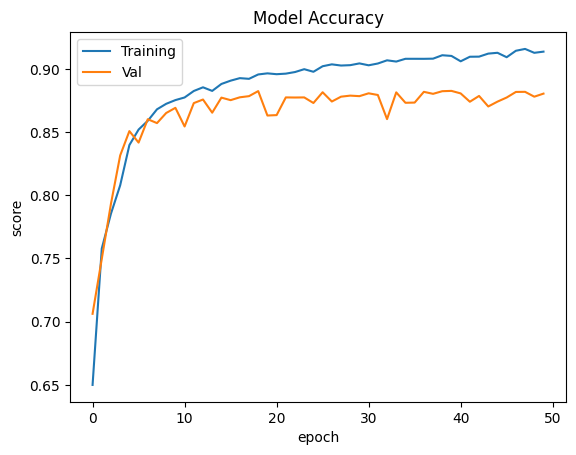

In [57]:
#evaluate the neural network by plotting results of training and validation scores 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('score')
plt.xlabel('epoch')
plt.legend(['Training','Val'],loc='upper left')
plt.show()

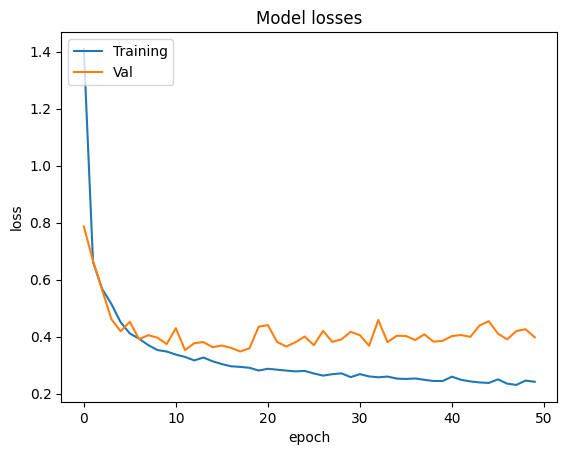

In [58]:
#evaluate the neural network by plotting results of loss in tarining and validation 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model losses')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training','Val'],loc='upper left')
plt.show()

In [59]:
y_probs = model.predict(x_test)
y_preds = y_probs.argmax(axis=1)
y_preds[:100]

313/313 [==============================] - 1s 2ms/step


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 2, 8, 0, 2, 5,
       7, 5, 1, 2, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 0, 1, 3, 7,
       6, 9, 2, 1, 2, 6, 6, 2, 5, 8, 2, 2, 8, 6, 8, 0, 7, 7, 8, 5, 1, 1,
       6, 4, 7, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2,
       0, 2, 5, 3, 6, 7, 1, 8, 0, 1, 4, 2])

In [60]:
y_test[:100]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5,
       7, 9, 1, 4, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 7,
       6, 7, 2, 1, 2, 2, 4, 4, 5, 8, 2, 2, 8, 4, 8, 0, 7, 7, 8, 5, 1, 1,
       2, 3, 9, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2,
       0, 6, 5, 3, 6, 7, 1, 8, 0, 1, 4, 2], dtype=uint8)

In [61]:
import random

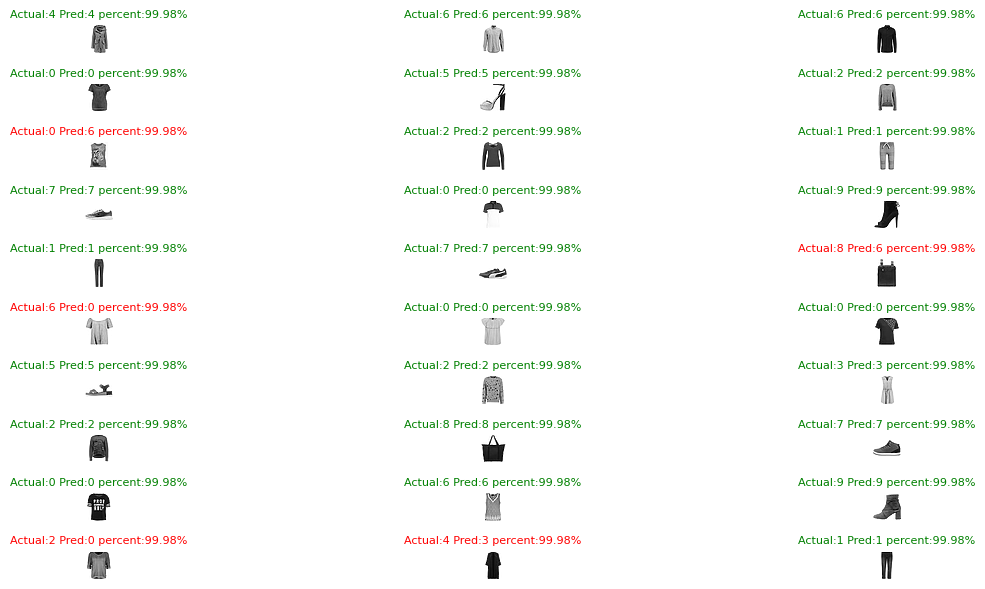

In [110]:
#plotting random images with its prediction and its actual value 
plt.figure(figsize = (15, 6))
plotnum=1
for i in range(31):
  random_num=random.randint(0,len(x_test))
  if plotnum<=30:
    ax=plt.subplot(10,3,plotnum)
    plt.imshow(x_test[random_num],cmap='binary')
    plt.axis('off')
    if y_test[random_num]==y_preds[random_num]:
      plt.title(f'Actual:{y_test[random_num]} Pred:{y_preds[random_num]} percent:{round(100*tf.reduce_max(y_probs[0]).numpy(),2)}%',
                 fontdict = {'fontsize'  : 8, 'color' : 'green'})

    else:
      plt.title(f'Actual:{y_test[random_num]} Pred:{y_preds[random_num]} percent:{round(100*tf.reduce_max(y_probs[0]).numpy(),2)}%',
                 fontdict = {'fontsize'  : 8, 'color' : 'red'})

  plotnum+=1

plt.tight_layout()